In [1]:
import pandas as pd

import torch
from torch import nn
from torch import Tensor
import math
import configparser
from torch.utils.data import Dataset, DataLoader

from torch import cuda

In [2]:
import series_transformer as st

dataset = st.CustomDataSet('data_agg.csv',window_length=128,prediction_window=7,require_date_split = False, drop_idx_column = True)

params = st.ParameterProvider("series_senti.config")
t1 = st.Transformer(params)

device_id = torch.cuda.current_device()
t1.cuda(device_id)

c:\Users\trzci\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


['Day of the week [-]', 'Temp [C]', 'Humidity [%]', 'Wind [m/s]', 'Clouds [1/8]', 'SUM - Entry [GWh/d]', 'SUM - Exit [GWh/d]', 'SUM - Exit t-1d [GWh/d]', 'Storage t-1d [GWh/d]', 'Storage [GWh/d]', 'negative', 'positive', 'neutral', 'negative_std', 'positive_std', 'neutral_std', 'day', 'month', 'year']


Transformer(
  (encoder_input_transformation): InputTransformation(
    (linear): Linear(in_features=19, out_features=32, bias=True)
  )
  (decoder_input_transformation): InputTransformation(
    (linear): Linear(in_features=19, out_features=32, bias=True)
  )
  (pos_encoding_in): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (pos_encoding_out): PositionalEncoding(
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder_stack): EncoderStack(
    (encoders): ModuleList(
      (0-5): 6 x EncoderLayer(
        (feed_forward): Sequential(
          (0): Linear(in_features=32, out_features=64, bias=True)
          (1): ReLU()
          (2): Linear(in_features=64, out_features=32, bias=True)
        )
        (mha): MultiHeadedAttention(
          (heads): ModuleList(
            (0-3): 4 x AttentionHead(
              (l): Linear(in_features=100, out_features=200, bias=True)
              (WQ): Linear(in_features=32, out_features=12, bias=True)
              (WK

In [3]:
output = t1(torch.unsqueeze(dataset[0][0],0).to(torch.float).cuda(device_id), torch.unsqueeze(dataset[0][1],0).to(torch.float).cuda(device_id))

In [4]:
output

tensor([[[-0.8743, -0.2504, -0.1749,  0.5306, -0.5684, -0.4037, -0.3755,
          -0.7346, -0.6580, -0.5878,  1.0227, -0.6928, -0.5705,  0.0141,
          -2.4601, -0.3024, -0.4970,  0.1370,  0.0218],
         [-0.8659, -0.1621, -0.1497,  0.4860, -0.4040, -0.3848, -0.1964,
          -1.0945, -0.5301, -0.4448,  1.1551, -0.5189, -0.6100,  0.0197,
          -2.3842, -0.3165, -0.6203,  0.2394, -0.0735],
         [-0.9025, -0.1653, -0.1941,  0.3631, -0.3831, -0.1562, -0.2204,
          -1.0745, -0.5461, -0.4653,  0.8817, -0.3383, -0.6741, -0.1684,
          -2.4140, -0.1996, -0.7483,  0.0309, -0.2266],
         [-0.6639, -0.2167, -0.4654,  0.1998, -0.2467, -0.4636, -0.1734,
          -0.9584, -0.6166, -0.4447,  1.1111, -0.3883, -0.6228, -0.4364,
          -2.1976, -0.2386, -0.8672,  0.0720, -0.2478],
         [-0.4499, -0.2179, -0.5275,  0.2886, -0.2537, -0.2929, -0.0920,
          -0.8212, -0.5586, -0.4645,  0.9682, -0.3201, -0.6775, -0.3062,
          -2.1566, -0.1975, -0.7581,  0.1507, 

In [5]:
dataset[0][2]

tensor([[0.5000, 0.4758, 0.5269, 0.4363, 0.4103, 0.3506, 0.1907, 0.1907, 0.0000,
         0.0000, 1.0000, 0.0000, 0.5000, 0.0000, 0.0000, 0.0000, 0.2667, 0.3636,
         0.0000],
        [0.6667, 0.4877, 0.5202, 0.2312, 0.2289, 0.3219, 0.1776, 0.1907, 0.0000,
         0.0000, 0.6750, 0.4000, 0.4000, 0.2277, 0.2811, 0.6325, 0.3000, 0.3636,
         0.0000],
        [0.8333, 0.6032, 0.5301, 0.3267, 0.2979, 0.3428, 0.1330, 0.1776, 0.0000,
         0.0000, 0.6750, 0.3333, 0.3500, 0.2277, 0.0000, 0.4830, 0.3333, 0.3636,
         0.0000],
        [1.0000, 0.6578, 0.6794, 0.3073, 0.3098, 0.3369, 0.1654, 0.1330, 0.0000,
         0.0000, 1.0000, 0.0000, 0.5000, 0.0000, 0.0000, 0.0000, 0.3667, 0.3636,
         0.0000],
        [0.0000, 0.6846, 0.6762, 0.1645, 0.1599, 0.3320, 0.1627, 0.1654, 0.0000,
         0.0000, 0.6875, 0.3333, 0.3750, 0.2357, 0.0000, 0.5000, 0.4000, 0.3636,
         0.0000],
        [0.0000, 0.7144, 0.4676, 0.1463, 0.1200, 0.3344, 0.1862, 0.1627, 0.0000,
         0.0000, 0.

In [6]:
train_dataset, test_dataset = dataset.getSets()
st.train_cuda(t1,train_dataset,device_id,epochs=1000,verbose_delay=-1)


Epoch 0 of 1000
Epoch loss: 0.09275985847032348
Epoch 1 of 1000
Epoch loss: 0.053645113526388656
Epoch 2 of 1000
Epoch loss: 0.05455019472296848
Epoch 3 of 1000
Epoch loss: 0.05466495029801546
Epoch 4 of 1000
Epoch loss: 0.05428254075868185
Epoch 5 of 1000
Epoch loss: 0.053757771416458974
Epoch 6 of 1000
Epoch loss: 0.05386174097657204
Epoch 7 of 1000
Epoch loss: 0.05317987475630849
Epoch 8 of 1000
Epoch loss: 0.05223458667480668
Epoch 9 of 1000
Epoch loss: 0.04652392890217692
Epoch 10 of 1000
Epoch loss: 0.04950907211317573
Epoch 11 of 1000
Epoch loss: 0.04324990818493588
Epoch 12 of 1000
Epoch loss: 0.042006201608929525
Epoch 13 of 1000
Epoch loss: 0.04036720491252666
Epoch 14 of 1000
Epoch loss: 0.04414334685303444
Epoch 15 of 1000
Epoch loss: 0.04213640241082325
Epoch 16 of 1000
Epoch loss: 0.03888560402705226
Epoch 17 of 1000
Epoch loss: 0.03960497027566267
Epoch 18 of 1000
Epoch loss: 0.03785131854373355
Epoch 19 of 1000
Epoch loss: 0.03918944853682851
Epoch 20 of 1000
Epoch loss

KeyboardInterrupt: 

R^2 tensor(0.6313)


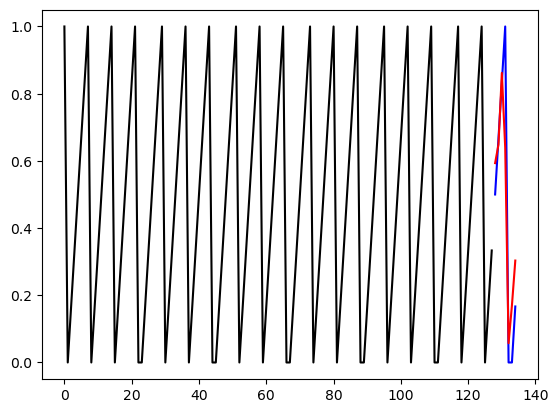

R^2 tensor(-29.2253)


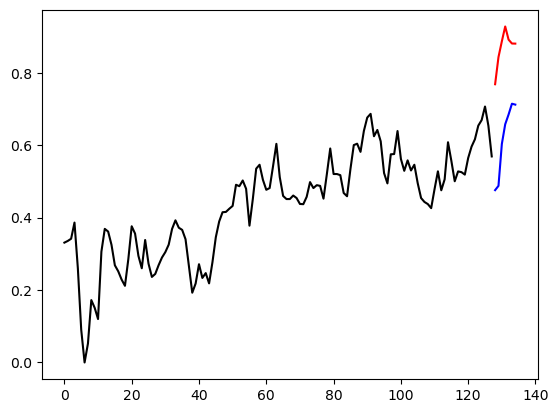

R^2 tensor(-7.8973)


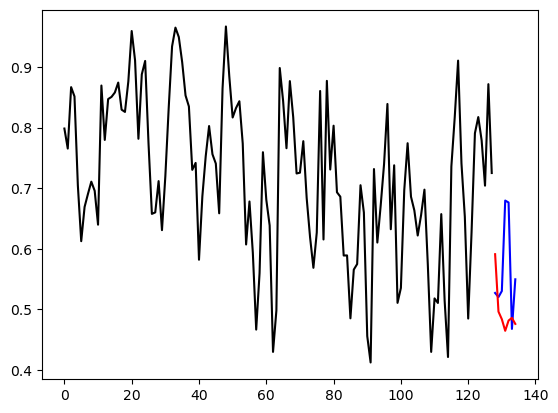

R^2 tensor(-2.4568)


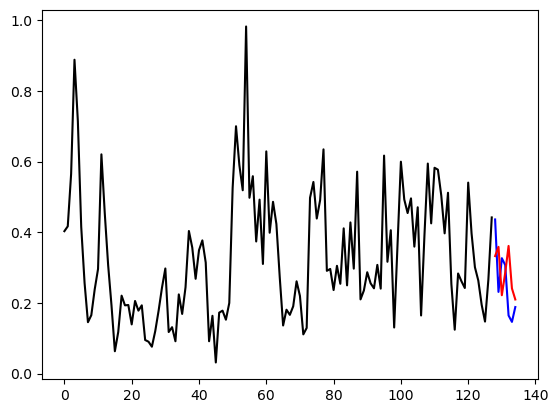

R^2 tensor(-1.0709)


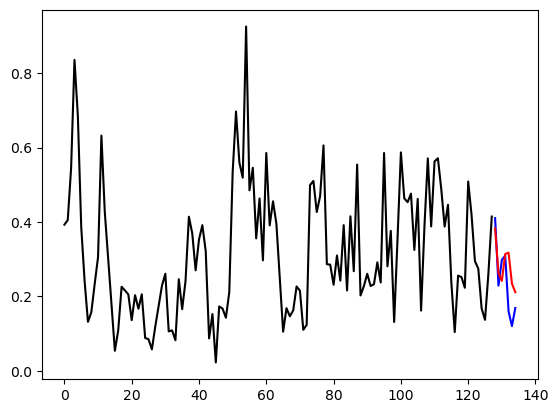

R^2 tensor(-5.3335)


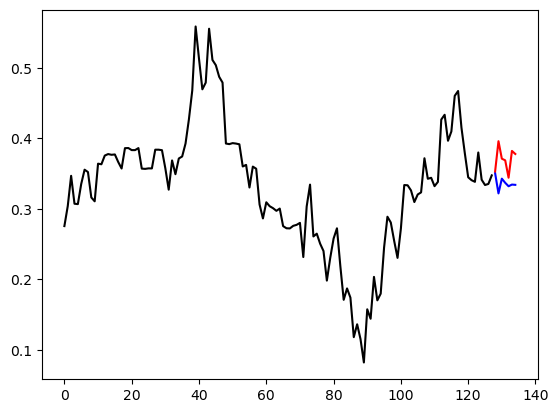

R^2 tensor(-1.0005)


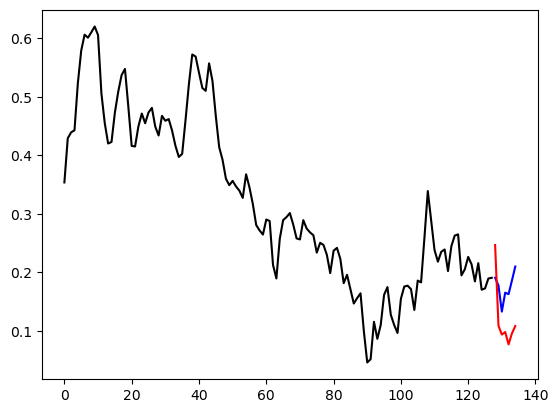

In [ ]:
for i in range(7):

    st.output_and_show(t1,train_dataset[0][0],train_dataset[0][2],device_id,i)